# **LE PERCEPTRON**

In [6]:
from perceptron import Perceptron
from numpy import array


**Données**

In [7]:
OU = [ (array([0,0,1]), 0),
       (array([0,1,1]), 1),
       (array([1,0,1]), 1),
       (array([1,1,1]), 1), ]

ET = [ (array([0,0,1]), 0),
       (array([0,1,1]), 0),
       (array([1,0,1]), 0),
       (array([1,1,1]), 1), ]

XOR = [ (array([0,0,1]), 0),
        (array([0,1,1]), 1),
        (array([1,0,1]), 1),
        (array([1,1,1]), 0), ]

In [8]:

def train_plot(exemples,nom_fonction):
    perceptron = Perceptron()
    perceptron.fit(exemples)
    print(f"======= PREDICTION POUR LA FONCTION {nom_fonction} ==============")
    print(f"X1=1 , X2 = 1 , prediction = {perceptron.predict(1,1)}")
    print(f"X1=1 , X2 = 0 , prediction = {perceptron.predict(1,0)}")
    print(f"X1=0 , X2 = 1 , prediction = {perceptron.predict(0,1)}")
    print(f"X1=0 , X2 = 0 , prediction = {perceptron.predict(0,0)}")
    print(perceptron.showEquation())
    perceptron.showHyperplanSeparateur()


**Entrainement du perceptron ET**

époque numéro 1 	 nombre d'erreurs 2
époque numéro 2 	 nombre d'erreurs 2
époque numéro 3 	 nombre d'erreurs 1
époque numéro 4 	 nombre d'erreurs 0


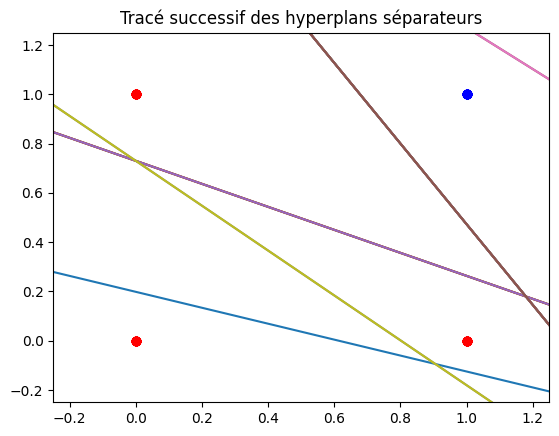

======= PREDICTION POUR LA FONCTION ET ==============
X1=1 , X2 = 1 , prediction = 1
X1=1 , X2 = 0 , prediction = 0
X1=0 , X2 = 1 , prediction = 0
X1=0 , X2 = 0 , prediction = 0
L'équation de la droite est (0.41036298111956854X1 + 0.25081746903512736X2 + -0.5289567696957793 = 0)


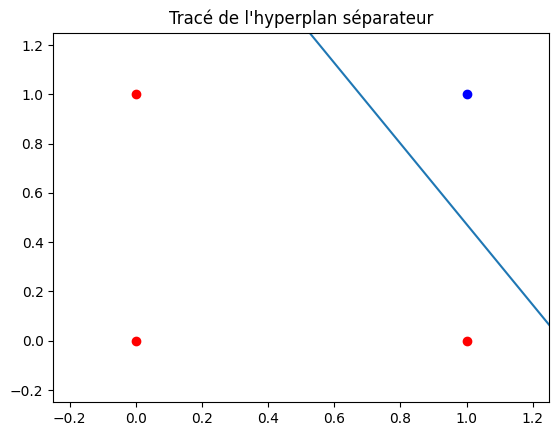

In [9]:
train_plot(ET,"ET")

**Entrainement du perceptron OU**

époque numéro 1 	 nombre d'erreurs 1
époque numéro 2 	 nombre d'erreurs 1
époque numéro 3 	 nombre d'erreurs 1
époque numéro 4 	 nombre d'erreurs 1


époque numéro 5 	 nombre d'erreurs 2
époque numéro 6 	 nombre d'erreurs 1
époque numéro 7 	 nombre d'erreurs 0


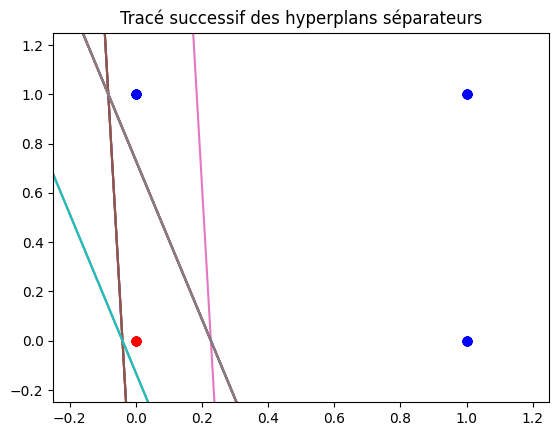

======= PREDICTION POUR LA FONCTION OU ==============
X1=1 , X2 = 1 , prediction = 1
X1=1 , X2 = 0 , prediction = 1
X1=0 , X2 = 1 , prediction = 1
X1=0 , X2 = 0 , prediction = 0
L'équation de la droite est (0.7480935155816444X1 + 0.23207242723724603X2 + -0.1696692100417727 = 0)


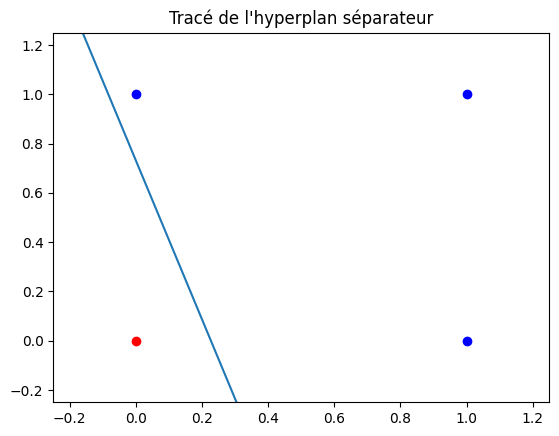

In [10]:
train_plot(OU,"OU")

***Reponses aux questions***                                                                            
-----------------------------------------------1----------------------------------------------- 

Les  droites de séparation trouvés séparent au mieux les deux classes (0 et 1). Elles généralisent à 100% la fonction ET et à 100% la fonction OU.

-----------------------------------------------2----------------------------------------------- 

Avec le OU exclusif , le perceptron ne converge pas. Il n'arrive pas à trouver un hyperplan séparateur. il n'arrive donc pas à généraliser la fonction XOR. Pour résoudre ce problème, il faudrait utiliser plusieurs couches de perceprtons. La difficulté de cette approche serait qu'après le calcul de l'erreur, on ne saurait pas comment modifier les différents paramètres afin d'améliorer notre modèle. 

------------------------------------------------------------------------------------------------------------- 

Dans le cas d’un problème réel, avec beaucoup d’exemples à apprendre et des entrées réelles (X ∈ Rn)

        1- Si le perceptron a du mal à converger, il faut:
            - Augmenter les itérations pour un apprentissage plus long
            - Privilégiez l'apprentissage par lot
            - Bien définir le taux d'apprentissage

        2- Si aucune convergence:
            - Utilisez des réseaux de perceptron
            - Projeter nos données dans une dimension supérieure pour les rendre linéairement séparables

**Entrainement du perceptron XOR**

In [11]:
#train_plot(XOR,"XOR") # Ne converge pas 